#pip install scikit-learn

#pip install missingno

#pip install seaborn

In [92]:
# importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#importing important libraaries for prediction

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
in_file='diabetes.csv'

In [3]:
#l loading the datset


df_diabetes = pd.read_csv(in_file)
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
# total number of columns in the dataset

df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# info about the dataset

df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

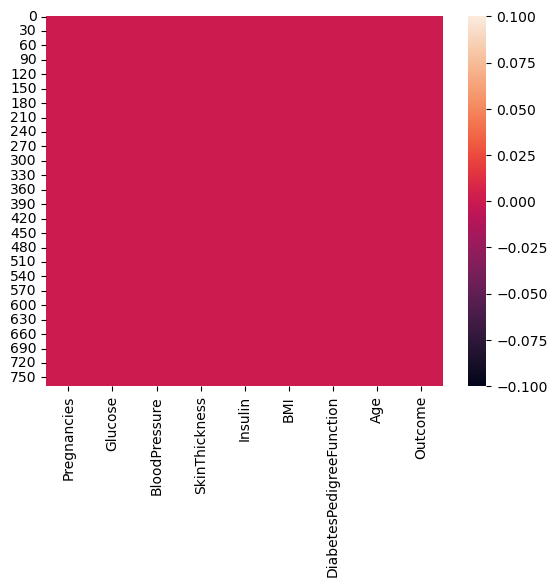

In [8]:
#to check for missing values

sns.heatmap(df_diabetes.isnull())
plt.show()

In [9]:
# to co relate the matrix

correlation=df_diabetes.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

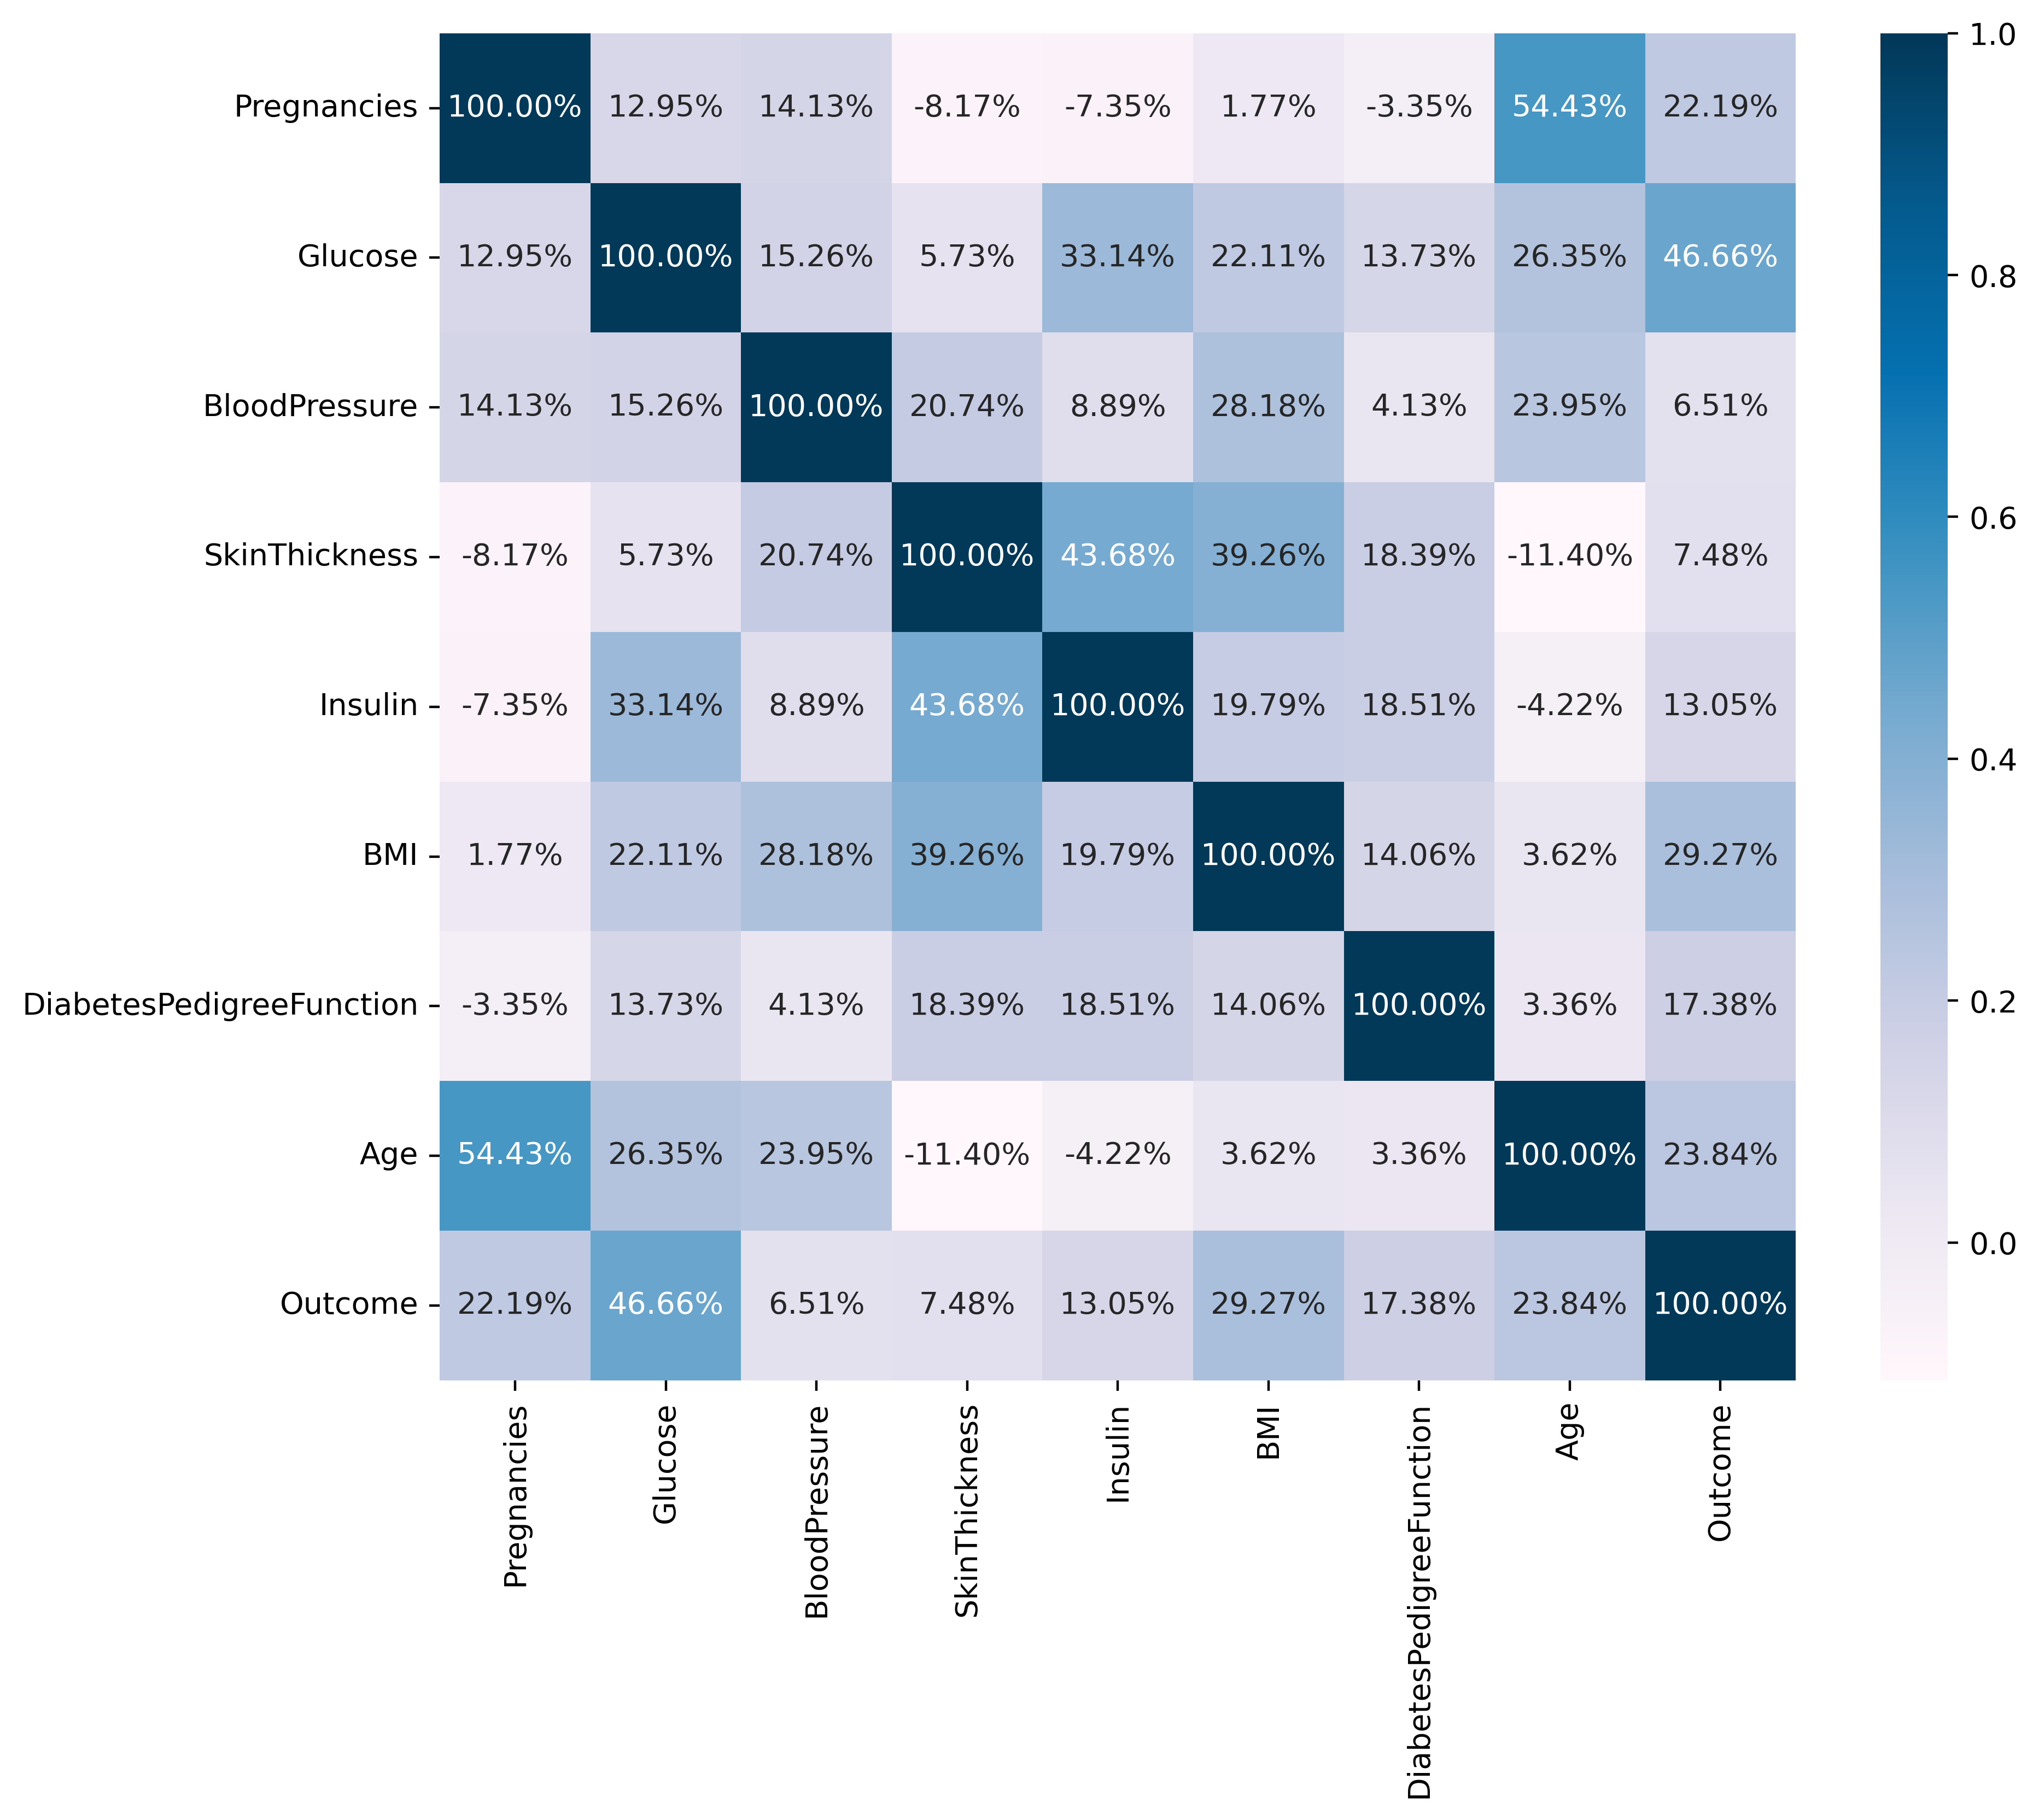

In [99]:
# visualizing the correlation


fig = plt.figure(figsize=(10,8), dpi = 400)
sns.heatmap(df_diabetes.corr(), annot = True, fmt = '.2%', cmap="PuBu")
plt.show()




# checking for total null
df_diabetes.isnull().sum()

In [ ]:
# plotting the data distribution plots

df_diabetes.hist(figsize=(17,14))
plt.show()

In [31]:
#aiming to input NAN values for the column in accordance with their distribution

df_diabetes_copy['Glucose'].fillna(df_diabetes_copy['Glucose'].mean(), inplace=True)
df_diabetes_copy['BloodPressure'].fillna(df_diabetes_copy['BloodPressure'].mean(), inplace=True)
df_diabetes_copy['SkinThickness'].fillna(df_diabetes_copy['SkinThickness'].median(), inplace=True)
df_diabetes_copy['Insulin'].fillna(df_diabetes_copy['Insulin'].median(), inplace=True)
df_diabetes_copy['BMI'].fillna(df_diabetes_copy['BMI'].median(), inplace=True)


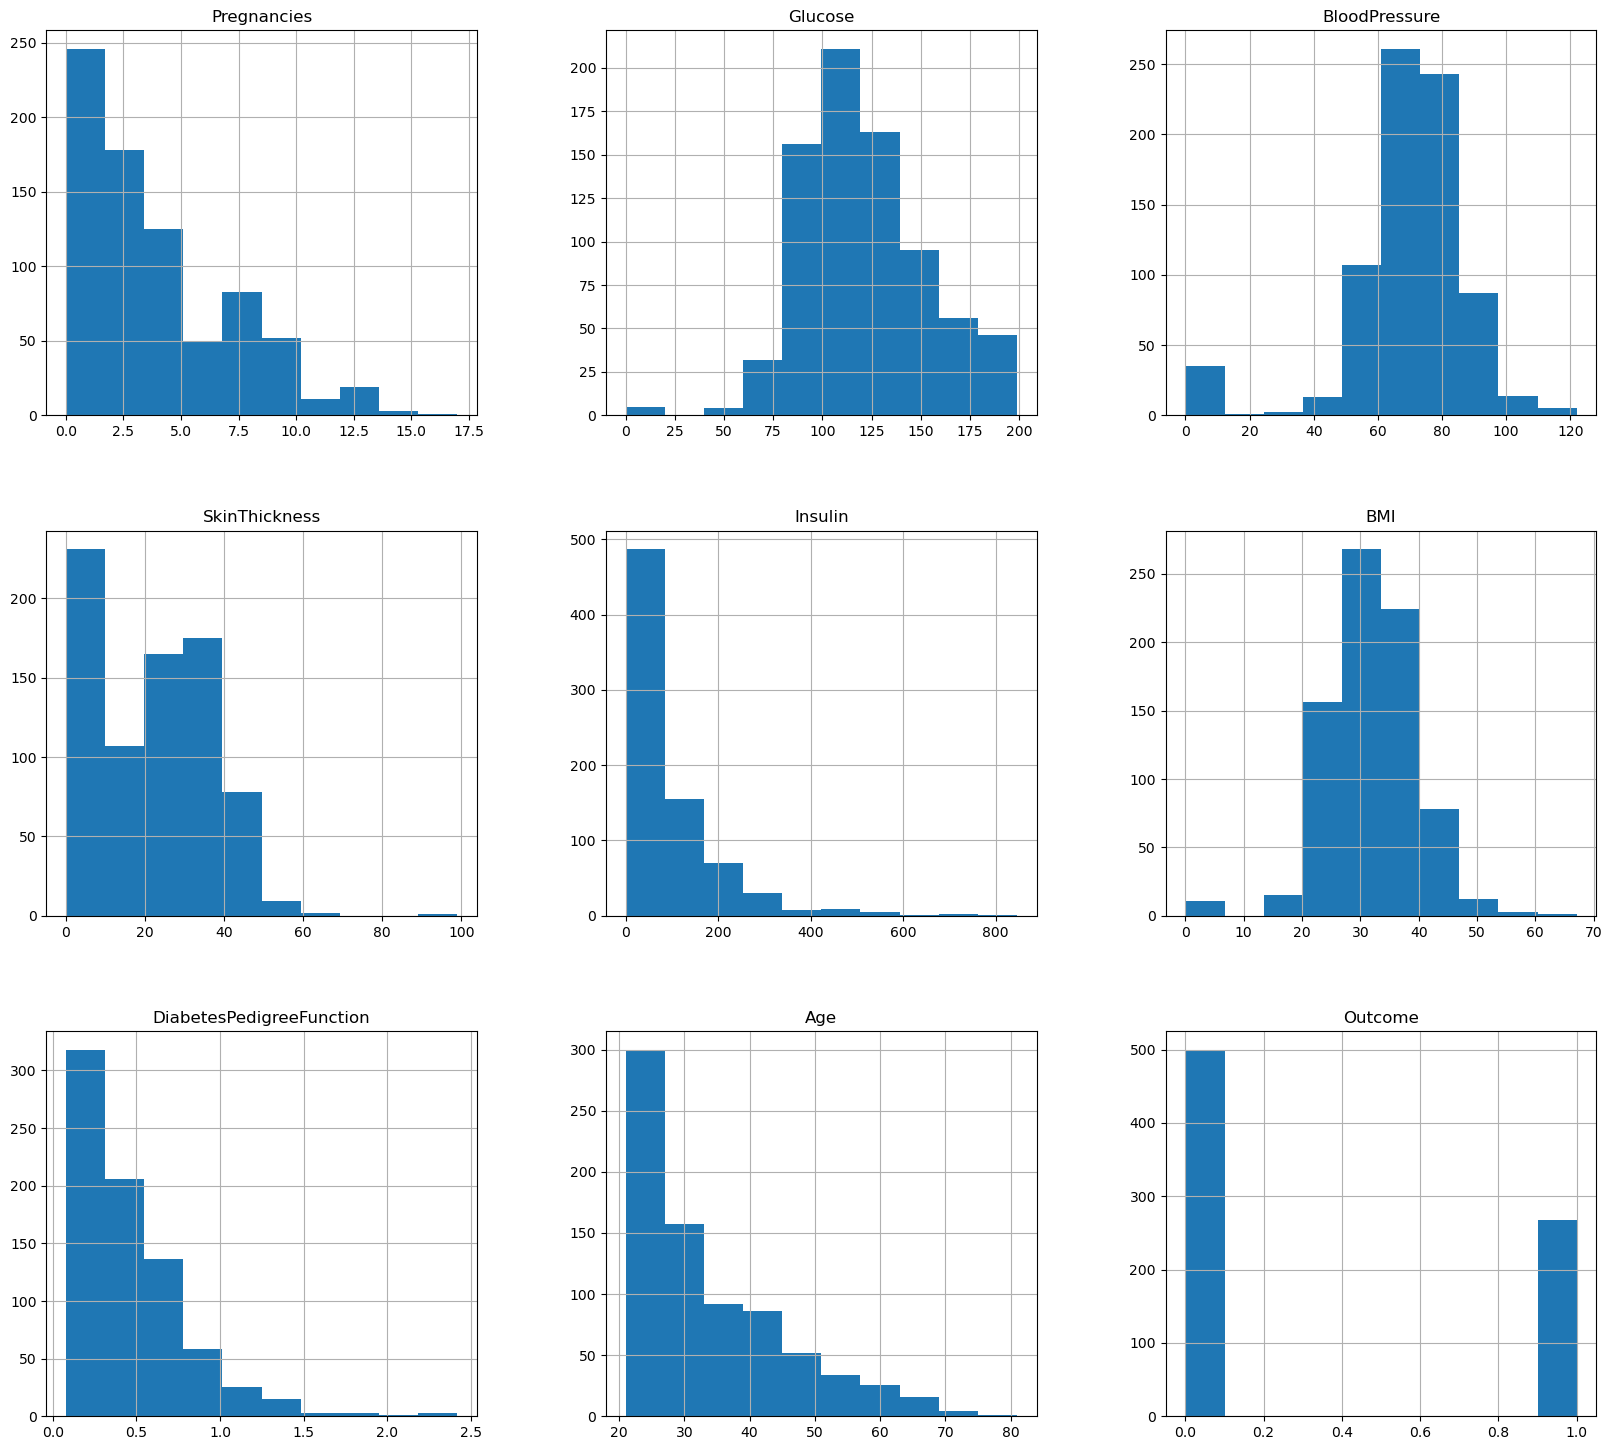

In [32]:
# plotting the distribution after the removing the NAN values

pt=df_diabetes_copy.hist(figsize=(20,18))

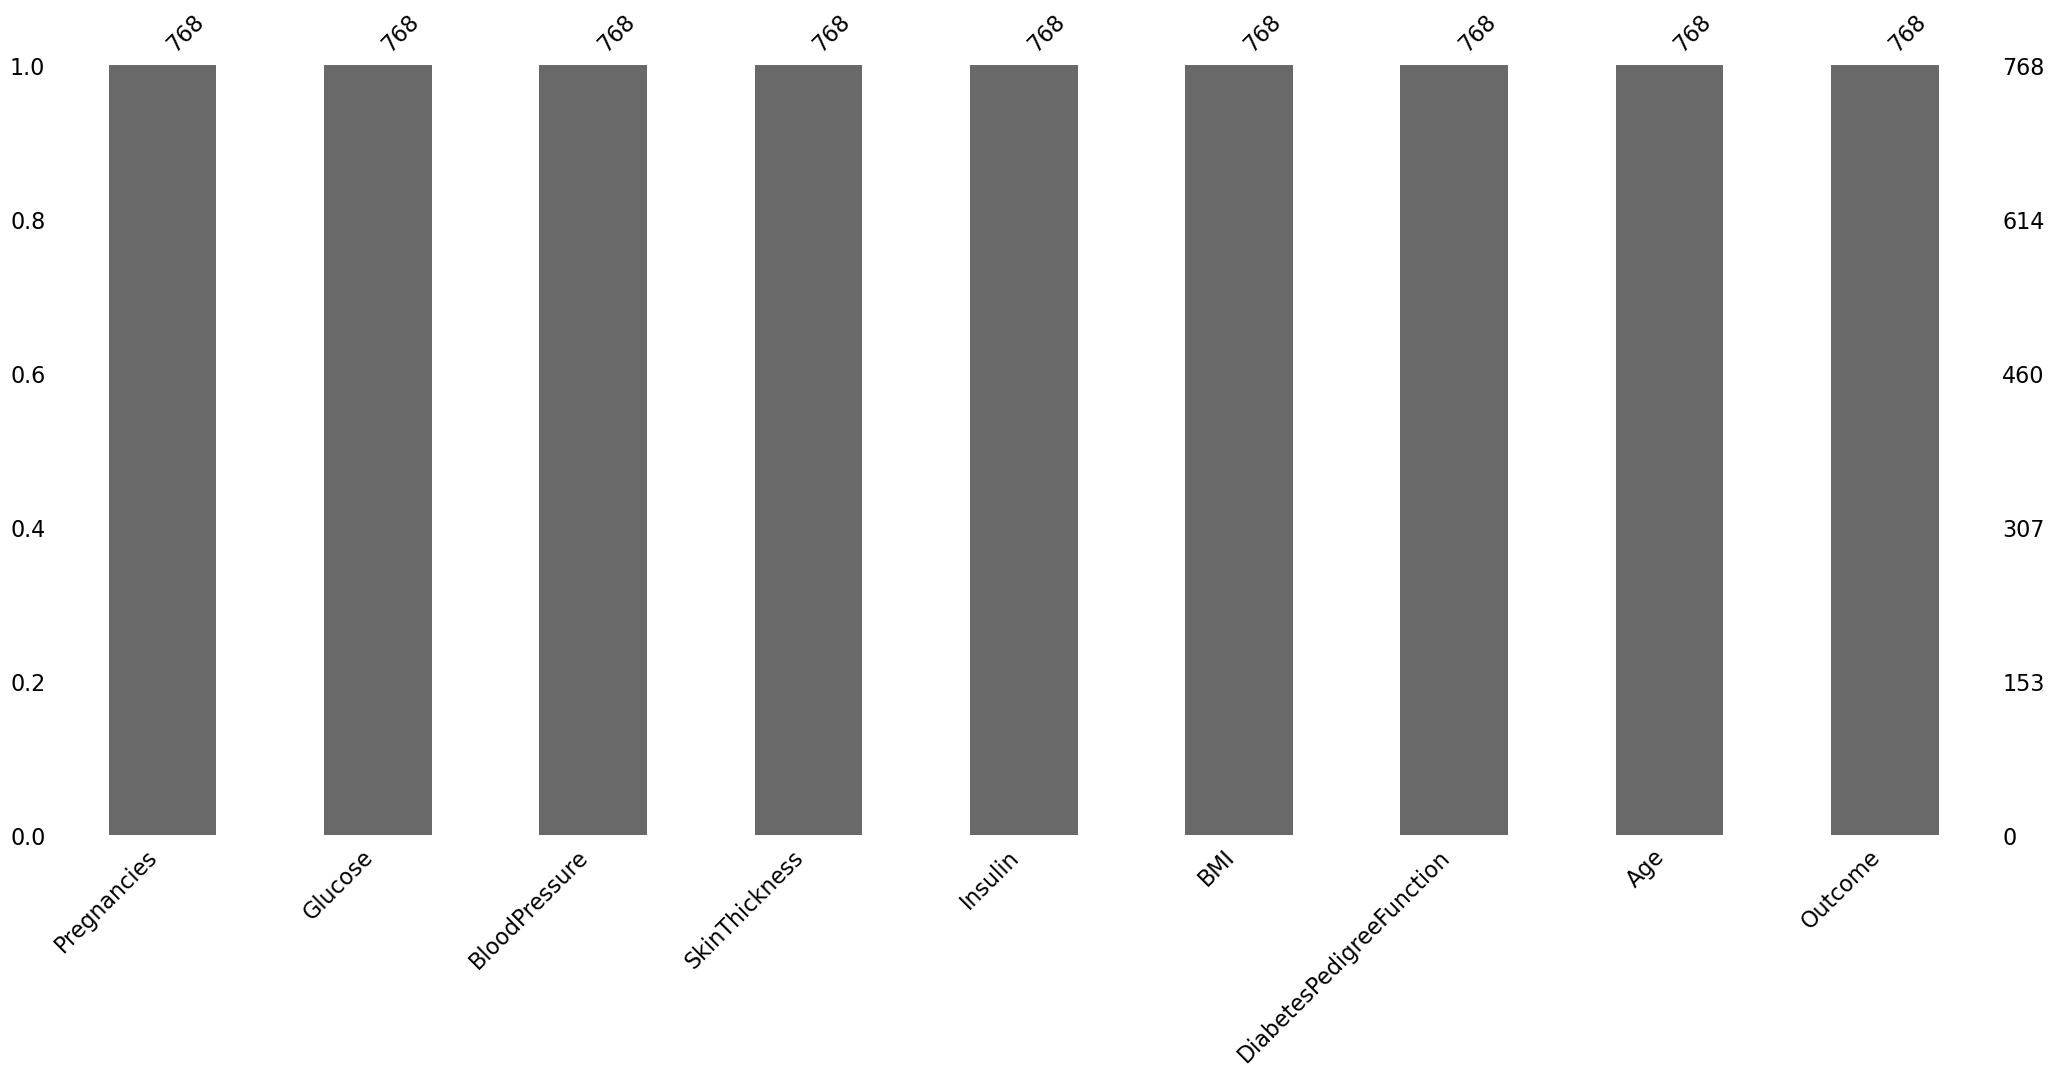

In [16]:
# plotting Null count analysis plot
pn=msno.bar(df_diabetes)

0    500
1    268
Name: Outcome, dtype: int64


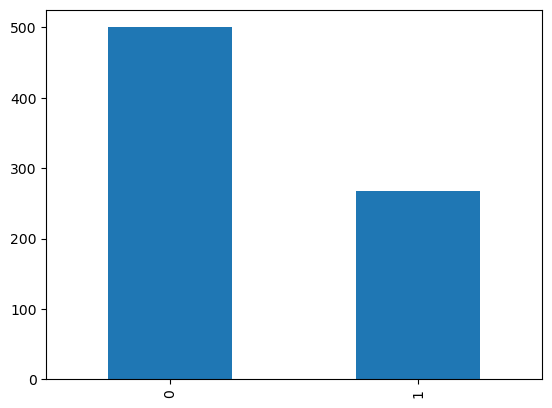

In [37]:
# checking the balance of the data by plotting the count by their values

color_wheel={1: "#0392cf", 
               2: "#7bc043",}
colors=df_diabetes["Outcome"].map(lambda x:color_wheel.get(x+1)) 
print(df_diabetes.Outcome.value_counts())
pc=df_diabetes.Outcome.value_counts().plot(kind="bar")


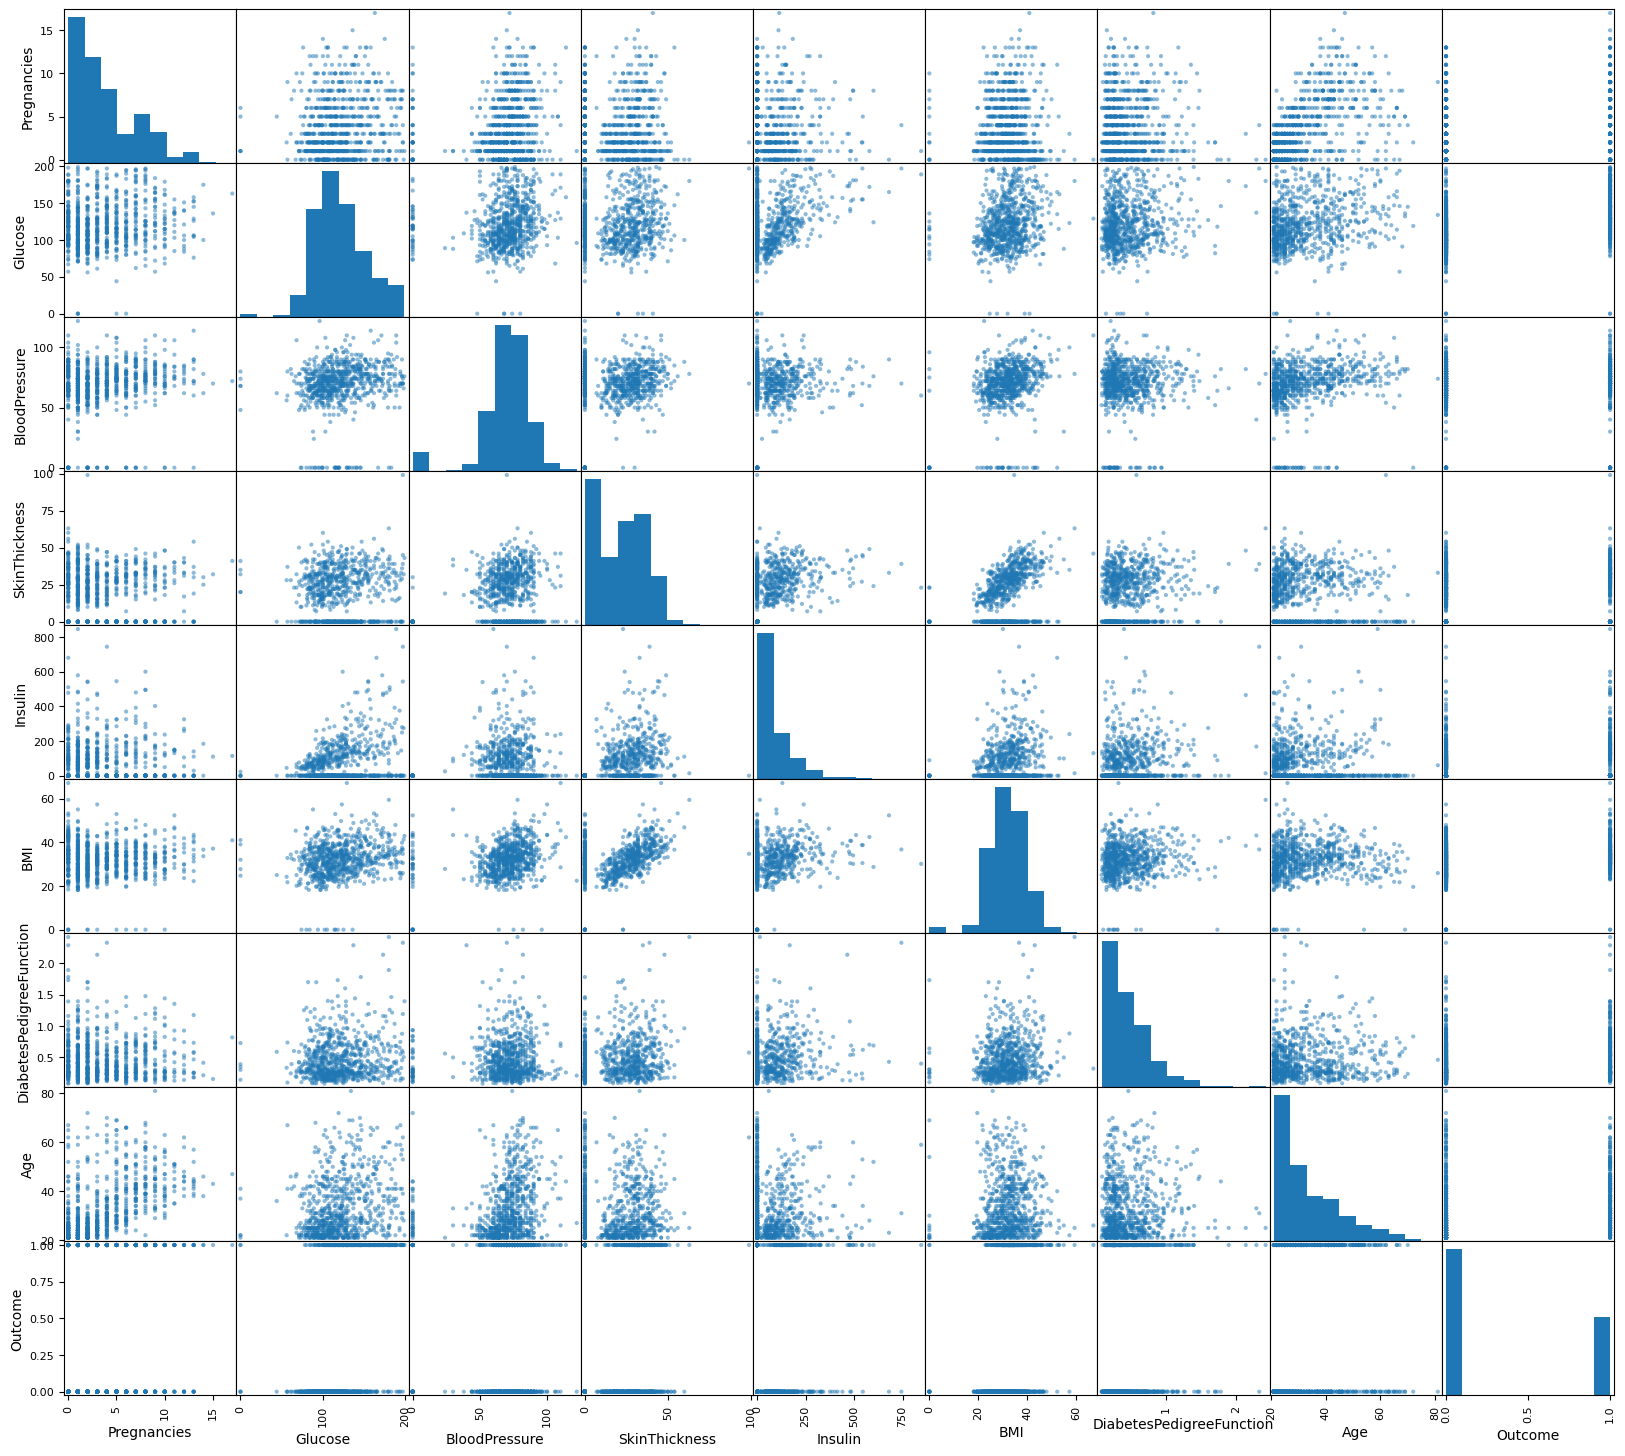

In [38]:
# plotting scatter matrix of uncleaned data

ac=scatter_matrix(df_diabetes, figsize=(20,18))

In [98]:
#diabetes report chart

fig=px.pie(df_diabetes,"Outcome",title="DIABETES CHART", color_discrete_sequence=['Red', 'Blue'])
fig.update_layout(width=400, height=400)
fig.show()

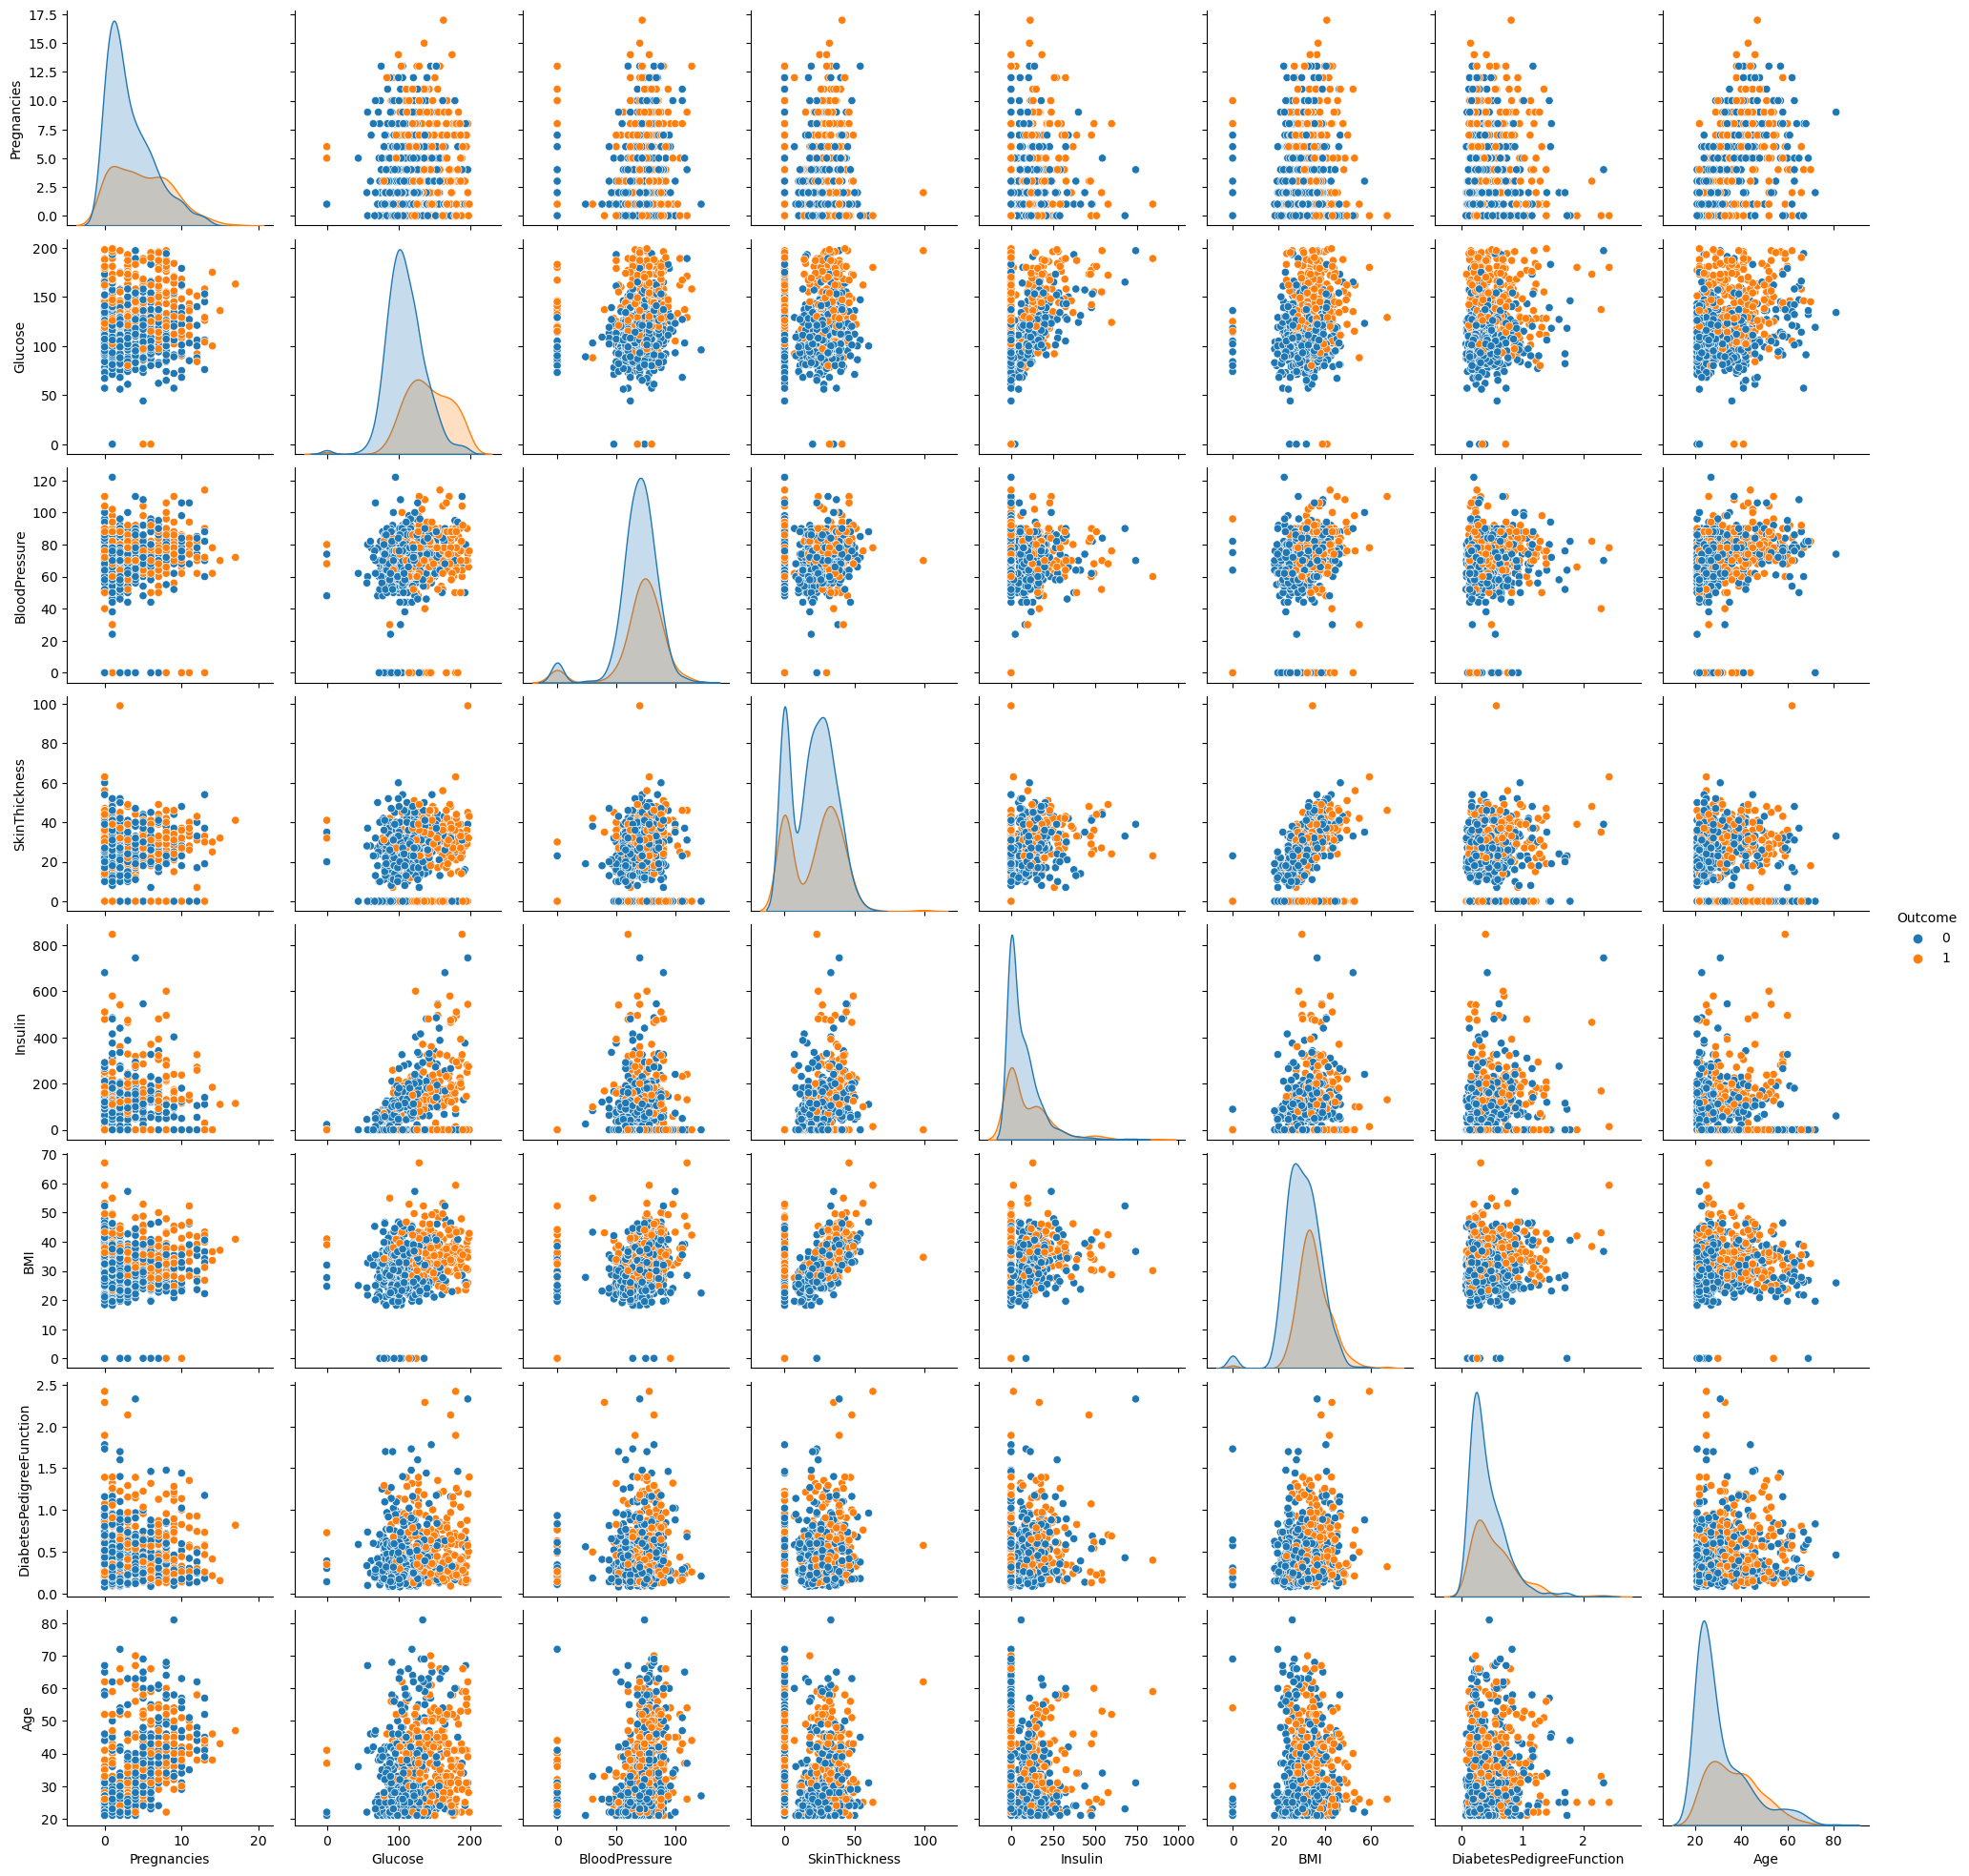

In [40]:
#plotting pairs plots for the data

sns.pairplot(df_diabetes_copy, hue='Outcome')
plt.show()